In [1]:
import pandas as pd
from utils import download_tsv_from_google_sheet, load_catalog, load_taxonomy

df_cat = load_catalog()
df_tax = load_taxonomy()

df_cat_available_free = df_cat[(df_cat['Available online'] == 'yes') & (df_cat['Price - non-commercial usage'] == 'free')]
df_cat_available_paid = df_cat[(df_cat['Available online'] == 'yes') & (df_cat['Price - non-commercial usage'] != 'free')]

print(df_cat.columns)


Reading speech data catalog
Reading speech data survey taxonomy
Index(['Dataset name', 'Dataset ID', 'Access type', 'Access link',
       'Available online', 'License', 'Publisher', 'Repository', 'Languages',
       'Creation year', 'ISLRN', 'ISBN', 'LR catalog ID',
       'Reference publication', 'Contact point', 'Latest version',
       'Last update year', 'Sponsor', 'Price - non-commercial usage',
       'Price - commercial usage', 'Purpose and split',
       'Size audio total [hours]', 'Size audio transcribed [hours]',
       'Size [GB]', 'Speakers', 'Audio recordings', 'Audio segmentation',
       'Tokens', 'Unique tokens', 'Automatic QA', 'Manual QA',
       'Manual QA scope', 'Transcription coverage', 'Transcription protocol',
       'Denormalized transcriptions', 'Transcription and annotation format',
       'Domain', 'Speech type', 'Audio collection process',
       'Speech recordings source', 'Acoustic environment', 'Audio device',
       'Device model', 'Audio format', 'Audi

In [2]:
from utils import datasets_count_and_total_size
col_groupby = ['Speech type']
df_datasets_per_speech_type = datasets_count_and_total_size(df_cat, col_groupby)
df_datasets_per_speech_type


Number of datasets  Total transcribed [hours]  \
Speech type                                                     
read                            25                     3362.1   
conversational                  13                     1184.0   
various                          4                     1134.0   
public speech                    8                      275.0   
no info                          3                       31.0   

                Percent of total  
Speech type                       
read                       56.17  
conversational             19.78  
various                    18.94  
public speech               4.59  
no info                     0.52

In [3]:
df_datasets_per_meta_paid = datasets_count_and_total_size(df_cat_available_paid, 'Part of speech annotation')
df_datasets_per_meta_paid


/home/michal/Development/hugging-face/michaljunczyk/pl-asr-speech-data-survey-analysis/utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col_sum] = num_values


Number of datasets  Total transcribed [hours]  \
Part of speech annotation                                                  
no                                         13                       3172   

                           Percent of total  
Part of speech annotation                    
no                                    100.0

In [4]:
from utils import metadata_coverage
df_meta_all_flat, df_meta_all_pivot = metadata_coverage(df_cat, df_cat_available_free, df_cat_available_paid)

             Number of datasets  Total transcribed [hours]  Percent of total
Gender info                                                                 
yes                          19                     4874.1             81.42
no info                      23                      889.0             14.85
no                           11                      223.0              3.73
          Number of datasets  Total transcribed [hours]  Percent of total
Age info                                                                 
no info                   33                     4043.0             67.54
yes                        8                     1581.0             26.41
no                        12                      362.1              6.05
             Number of datasets  Total transcribed [hours]  Percent of total
Accent info                                                                 
no                           49                     4276.1             71.43
yes           

/home/michal/Development/hugging-face/michaljunczyk/pl-asr-speech-data-survey-analysis/utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col_sum] = num_values
/home/michal/Development/hugging-face/michaljunczyk/pl-asr-speech-data-survey-analysis/utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col_sum] = num_values
/home/michal/Development/hugging-face/michaljunczyk/pl-asr-speech-data-survey-analysis/utils.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy

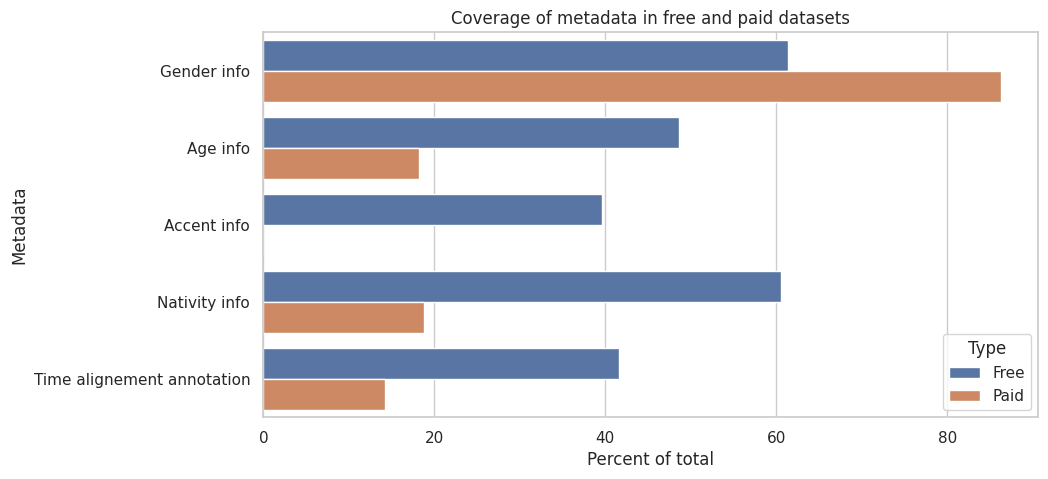

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# compare coverage of free and paid datasets for all metadata

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Percent of total", y=df_meta_all_flat.index, hue="Type", data=df_meta_all_flat)
plt.title('Coverage of metadata in free and paid datasets')
plt.xlabel('Percent of total')
plt.ylabel('Metadata')
plt.show()

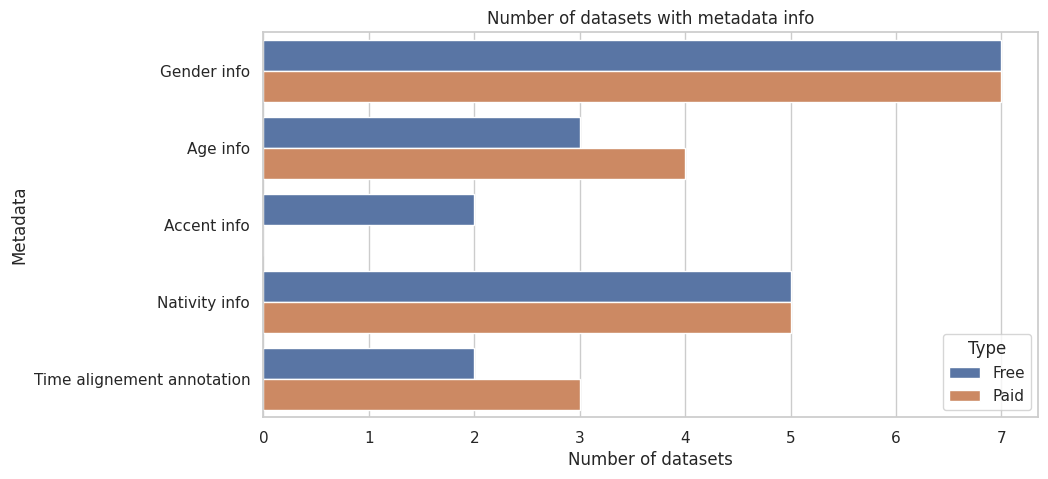

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Number of datasets", y=df_meta_all_flat.index, hue="Type", data=df_meta_all_flat)
plt.title('Number of datasets with metadata info')
plt.xlabel('Number of datasets')
plt.ylabel('Metadata')
plt.show()

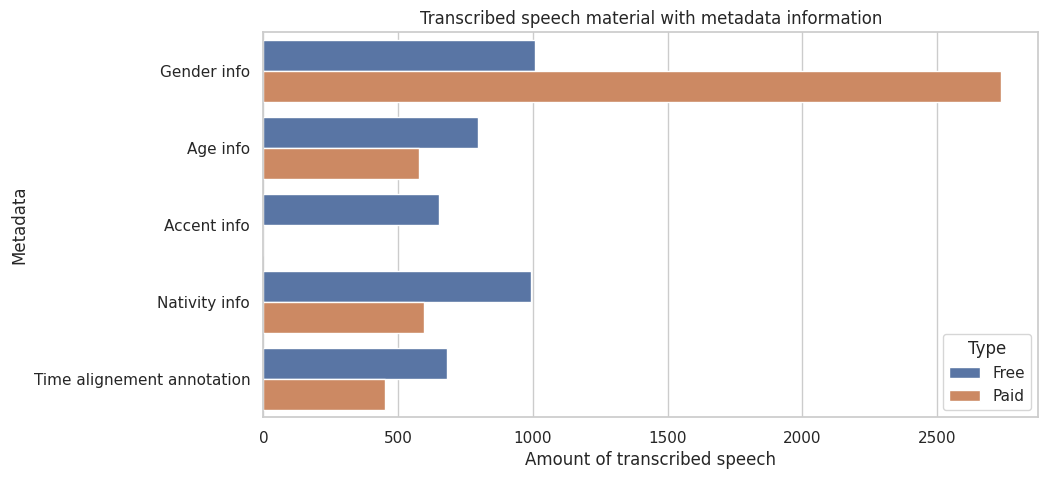

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Total transcribed [hours]", y=df_meta_all_flat.index, hue="Type", data=df_meta_all_flat)
plt.title('Transcribed speech material with metadata information')
plt.xlabel('Amount of transcribed speech')
plt.ylabel('Metadata')
plt.show()